1. Name of activity
2. Your name
3. Your UVA computing ID

## Tasks
#### Select a country, analyze its vaccination data, and answer the following questions:
 

* Total number of vaccinations;
* Percent of vaccinations from entire population;
* Daily number of vaccinations;
* Daily number of vaccination per million population;
* People vaccinated;
* Percent of vaccinated people from entire population.
* Due to the impact of the weekend, the vaccine data may be inaccurate. Please calculate the vaccine administration 7-day rolling average. Draw the trend line of the number of people vaccinated each day.

In [88]:
import pandas as pd
import seaborn as sns 


In [2]:
df = pd.read_csv('country_vaccinations.csv', index_col=2, parse_dates=True)
df.tail()

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-03-29,Zimbabwe,ZWE,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
2021-03-30,Zimbabwe,ZWE,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
2021-03-31,Zimbabwe,ZWE,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
2021-04-01,Zimbabwe,ZWE,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
2021-04-02,Zimbabwe,ZWE,124753.0,103815.0,20938.0,19446.0,8156.0,0.84,0.70,0.14,549.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...


Select a country `'United States'`; the choice will be stored in `selected_country` variable:

In [3]:
selected_country = 'United States'
df.loc[df.country == selected_country].shape

(105, 14)

#### Total number of vaccinations:

In [4]:
df.loc[df.country == selected_country]['total_vaccinations'].tail(1)

date
2021-04-03    161688422.0
Name: total_vaccinations, dtype: float64

#### Percent of vaccinations from entire population: 

In [6]:
df.loc[df.country == selected_country]['people_vaccinated_per_hundred'].tail(1)

date
2021-04-03    31.16
Name: people_vaccinated_per_hundred, dtype: float64

#### Daily number of vaccinations:

In [37]:
df.loc[df.country == selected_country]['daily_vaccinations'].tail(1)

date
2021-04-03    3072527.0
Name: daily_vaccinations, dtype: float64

#### Daily number of vaccination per million population:

In [39]:
df.loc[df.country == selected_country]['daily_vaccinations_per_million'].tail(1)

date
2021-04-03    9187.0
Name: daily_vaccinations_per_million, dtype: float64

#### People vaccinated

In [9]:
df.loc[df.country == selected_country]['people_vaccinated'].tail(1)

date
2021-04-03    104213478.0
Name: people_vaccinated, dtype: float64

#### Percent of vaccinated people from entire population.

In [13]:
df.loc[df.country == selected_country]['people_fully_vaccinated_per_hundred'].tail(1)

date
2021-04-03    17.9
Name: people_fully_vaccinated_per_hundred, dtype: float64

#### Due to the impact of the weekend, the vaccine data may be inaccurate. Please calculate the vaccine administration 7-day rolling average. Draw the trend line of the number of people vaccinated each day

In [76]:
weakly_rolling_mean = df.loc[df.country == selected_country]['daily_vaccinations_per_million'].rolling(window=7).mean()
daily_vacs_per_mill = df.loc[df.country == selected_country]['daily_vaccinations_per_million']

Text(0, 0.5, 'Daily vaccinations per million and 7-day rolling average')

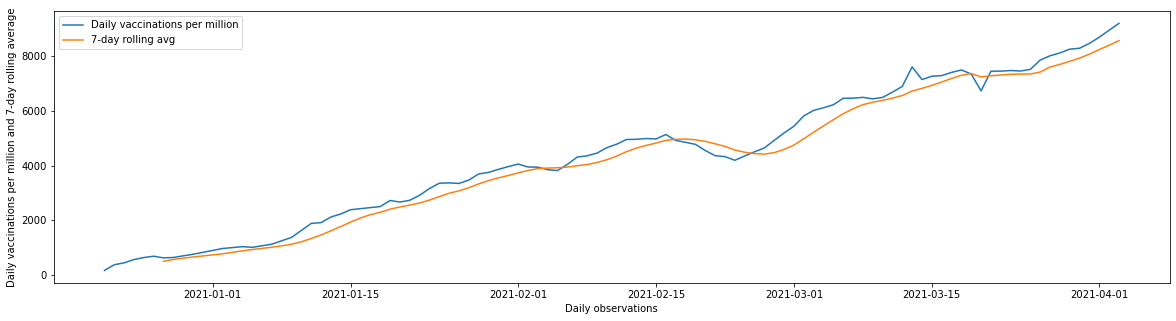

In [85]:
plt.figure( figsize = (20, 5))

sns.lineplot( x =  df.loc[df.country == selected_country].index,
             y = df.loc[df.country == selected_country]['daily_vaccinations_per_million'],
             data = df,
             label = 'Daily vaccinations per million')
  
# plot using rolling average
sns.lineplot( x = df.loc[df.country == selected_country].index,
             y = df.loc[df.country == selected_country]['daily_vaccinations_per_million'].rolling(window=7).mean(),
             data = df,
             label = '7-day rolling avg')
  
plt.xlabel('Daily observations')

  
plt.ylabel('Daily vaccinations per million and 7-day rolling average')

#### Checks:

In [53]:
vaccines_count = df.loc[df.country == selected_country]['people_vaccinated'].tail(1) 
percent_share = (df.loc[df.country == selected_country]['people_vaccinated_per_hundred'].tail(1)/100)
population_est_mil = (vaccines_count / percent_share) / 1000000
population_est_mil # recreating population estoimate in millions

date
2021-04-03    334.446335
dtype: float64

#### Daily number of vaccination per million population, expected 9 thousand:

In [52]:
df.loc[df.country == selected_country]['daily_vaccinations'].tail(1) / population_est_mil

date
2021-04-03    9186.905874
dtype: float64

#### Percent of people with at least 1 does, expected 31%:

In [47]:
df.loc[df.country == selected_country]['people_vaccinated'].tail(1)/1000000 / population_est_mil

date
2021-04-03    0.3116
dtype: float64

#### Percent of fully vaccinated people, expected 18%:

In [46]:
df.loc[df.country == selected_country]['people_fully_vaccinated'].tail(1)/1000000 / population_est_mil

date
2021-04-03    0.178977
dtype: float64